In [47]:
import pandas as pd
import numpy as np
from natsort import natsorted
import os


base_path = '600s'
aw_values = range(25, 151, 25)
agents = ['1_agent','2_agents','4_agents','6_agents','8_agents','12_agents']
agent_n = [1,2,4,6,8,12]
maps = ['DIAG_floor1','cumberland','example','grid']
datasets = {}

for map in maps:
    for i, agent in enumerate(agents):
        averages = np.zeros((30,3))
        best = np.zeros((5,6))
        dtag_folder_path = f'{base_path}/dtag/{map}/{agent}/dtag_{map}_{agent_n[i]}_all.csv'
        dtap_folder_path = f'{base_path}/dtap/{map}/{agent}/dtap_{map}_{agent_n[i]}_all.csv'
        cbls_folder_path = f'{base_path}/cbls/{map}/{agent}/cbls_{map}_{agent_n[i]}_all.csv'
        cbls_m_folder_path = f'{base_path}/cbls_m/{map}/{agent}/cbls_m_{map}_{agent_n[i]}_all.csv'
        sebs_folder_path = f'{base_path}/sebs/{map}/{agent}/sebs_{map}_{agent_n[i]}_all.csv'

        dtag = pd.read_csv(dtag_folder_path, sep=';', header=None)
        dtap = pd.read_csv(dtap_folder_path, sep=';', header=None)
        cbls = pd.read_csv(cbls_folder_path, sep=';', header=None)
        cbls_m = pd.read_csv(cbls_m_folder_path, sep=';', header=None)
        sebs = pd.read_csv(sebs_folder_path, sep=';', header=None)

        result_concatenated = pd.concat([dtag, dtap, cbls, cbls_m, sebs], axis=0)
        dataset = result_concatenated.to_numpy()
        N = int(len(dataset[0,:])/6)
        for j in range(len(dataset)):
            averages[j,:] = [sum(dataset[j,0:N])/N,sum(dataset[j,N*2:N*3])/N,sum(dataset[j,N*4:N*5])/N]
            best[j//6,j%6] = max([sum(dataset[j,0:N])/N,sum(dataset[j,N*2:N*3])/N,sum(dataset[j,N*4:N*5])/N])
        # dataset = np.reshape(dataset, (5, 3, -1, 20))

        # Store the dataset in the dictionary with the AW value as the key
        datasets[f'{map}_{agent}'] = best




legend_fontsize = 14
axis_fontsize = 16
tick_fontsize = 12

datasets


{'DIAG_floor1_1_agent': array([[0.96600067, 0.95889111, 0.94728198, 0.93090456, 0.91575262,
         0.90970462],
        [0.99985634, 0.99963929, 0.99956166, 0.99954096, 0.99910321,
         0.99842232],
        [0.96001458, 0.93430575, 0.91189677, 0.89131924, 0.8722178 ,
         0.85450694],
        [0.96300266, 0.93084936, 0.89999335, 0.87006288, 0.8409291 ,
         0.81248418],
        [0.94973903, 0.91181835, 0.87539753, 0.83993789, 0.80530061,
         0.77153194]]),
 'DIAG_floor1_2_agents': array([[0.92876491, 0.87374918, 0.85734406, 0.82920281, 0.79911696,
         0.76834073],
        [0.99518262, 0.99075626, 0.98529087, 0.97266211, 0.94578914,
         0.92298083],
        [0.91819406, 0.87207745, 0.83498268, 0.80223351, 0.77259901,
         0.74552405],
        [0.91136067, 0.83530499, 0.77283269, 0.74510791, 0.71741668,
         0.68934466],
        [0.89920716, 0.82529999, 0.75581312, 0.68958435, 0.64352042,
         0.60071694]]),
 'DIAG_floor1_4_agents': array([[0.8285

In [49]:
import numpy as np

# Assuming 'maps' and 'agents' are defined lists
# Assuming 'datasets' is a dictionary containing numpy arrays

# Initialize the AW_average array
AW_average_old = np.zeros((5, 6))
success_probabilities_old = np.zeros((5,6))

# Iterate through each map and agent
for j, map in enumerate(maps):
    for i, agent in enumerate(agents):
        # Retrieve the dataset for the current map and agent
        temp = datasets[f'{map}_{agent}']
        for k, array in enumerate(temp):

            success_probabilities_old[k,i] += sum(array)/24

        # Update the AW_average array
        AW_average_old += temp / 24

# Output the final AW_average array
print(success_probabilities_old.T)

[[0.98452231 0.99983842 0.82756523 0.86249848 0.94093061]
 [0.85997365 0.89483799 0.69626176 0.72146889 0.72119376]
 [0.59208081 0.5916305  0.53646739 0.49254309 0.49594736]
 [0.42015333 0.38201822 0.41478647 0.34978195 0.30244302]
 [0.31190828 0.28978902 0.33722729 0.25507475 0.21712958]
 [0.19137478 0.2429786  0.23775204 0.18400266 0.11940256]]


In [40]:
names =  [1,2,4,6,8,12]
mapss = ['Diag', 'Cumberland', 'Example', 'Grid']


# Initialize an empty DataFrame
df = pd.DataFrame()
df['Agent count'] = [i for i in names]
df.set_index(['Agent count'])

# Iterate over the algorithms
for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):


    success_probability = sum(all_successful_counts[j,:,:,0]) / sum(all_total_counts[j, :, :])

    df[algo] = [i for i in success_probability]

# Display the DataFrame
print(df)
for i, map in enumerate(mapss):

    names =  [1,2,4,6,8,12]

    # Initialize an empty DataFrame
    df = pd.DataFrame()
    df['Agent count'] = [i for i in names]
    df.set_index(['Agent count'])

    # Iterate over the algorithms
    for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):


        success_probability = all_successful_counts[j,i,:,0] / all_total_counts[j, i, :]


        df[algo] = [l for l in success_probability]

    # Display the DataFrame
    print(map)
    print(df)

NameError: name 'all_successful_counts' is not defined

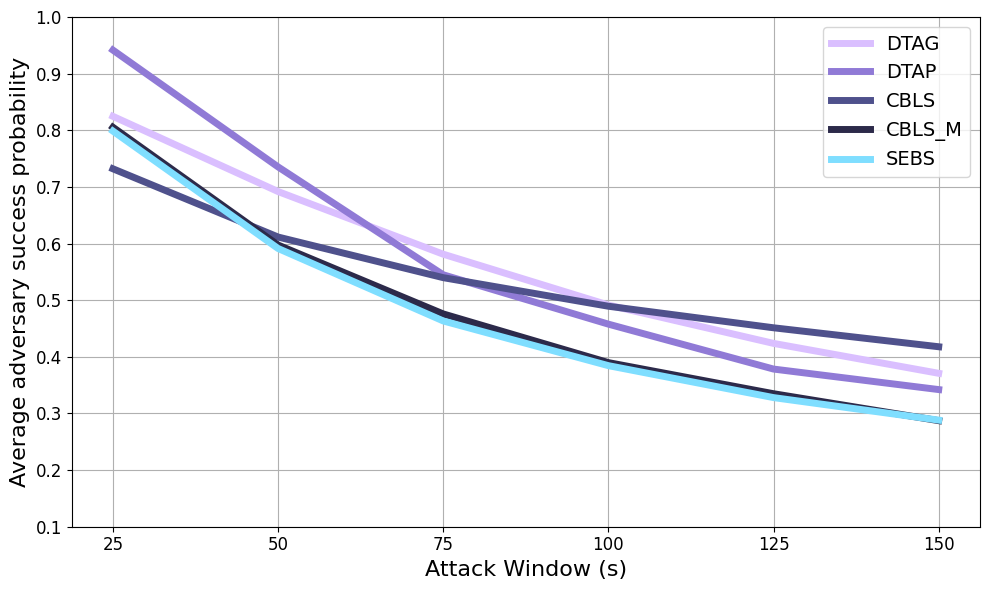

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

agents = np.arange(1, 7)

colours = ['#DABFFF', '#907AD6', '#4F518C', '#2C2A4A', '#7FDEFF']



fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharex=True, sharey=True)

for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):
    # Iterate over each subplot and plot the data

    ax.plot(agents, AW_average[j,:], color=colours[j], label=algo, linewidth=5)

    ax.set_xticks(agents)
    ax.set_xticklabels(['{:.0f}'.format(x) for x in range(25,151,25)])
    ax.legend(fontsize=legend_fontsize)
    ax.set_yticks(np.arange(0.1, 1.1, 0.1))
    ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0.1, 1.1, 0.1)])

    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.grid()

# Set the y-axis label for the left subplots
ax.set_ylabel('Average adversary success probability', fontsize=axis_fontsize)

# Set the x-axis label for the bottom subplots
ax.set_xlabel('Attack Window (s)', fontsize=axis_fontsize)


plt.tight_layout()
plt.savefig('plots/average_success_probability_old_model')
plt.show()
plt.close(fig)